# WeatherPy
----


* Observations are explained below the plots



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url="http://api.openweathermap.org/data/2.5/weather?"
key=f"appid={api_key}"


In [ ]:
# city="Los Angeles"

# full_url=f"{url}q={city}&{key}&units=metric"

# response = requests.get(full_url)
# data = response.json()
# pprint(data)


# City_Name=data["name"]
# Country=data["sys"]["country"]
# Date=data["dt"]
# Lat=data["coord"]["lat"]
# Lng=data["coord"]["lon"]
# Temp=data["main"]["temp_max"]
# Humid=data["main"]["humidity"]
# Cloud=data["clouds"]["all"]
# Wind_Speed=data["wind"]["speed"]

In [5]:
# set up lists to hold reponse info
City_Name = []
Country = []
Date = []
Lat = []
Lng = []
Temp = []
Humid = []
Cloud = []
Wind_Speed = []
count = 0
    
# Loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    weather_response = requests.get(f"{url}&q={city}&{key}&units=imperial")
    weather_data = weather_response.json()
    try:
        City_Name.append(weather_data['name'])
        Country.append(weather_data["sys"]["country"])
        Date.append(weather_data["dt"])
        Lat.append(weather_data["coord"]["lat"])
        Lng.append(weather_data["coord"]["lon"])
        Temp.append(weather_data["main"]["temp_max"])
        Humid.append(weather_data["main"]["humidity"])
        Cloud.append(weather_data["clouds"]["all"])
        Wind_Speed.append(weather_data["wind"]["speed"])
        count += 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("City not found. Skipping...") 
        pass
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | geraldton
Processing record 2 of Set 1 | halifax
Processing record 3 of Set 1 | torbay
Processing record 4 of Set 1 | nikolskoye
Processing record 5 of Set 1 | busselton
Processing record 6 of Set 1 | barrow
Processing record 7 of Set 1 | bluff
Processing record 8 of Set 1 | papillion
Processing record 9 of Set 1 | ushuaia
Processing record 10 of Set 1 | arraial do cabo
Processing record 11 of Set 1 | frontera
Processing record 12 of Set 1 | mataura
Processing record 13 of Set 1 | salalah
Processing record 14 of Set 1 | esperance
Processing record 15 of Set 1 | sitka
Processing record 16 of Set 1 | cape town
City not found. Skipping...
Processing record 17 of Set 1 | tromso
Processing record 18 of Set 1 | marienburg
Processing record 19 of Set 1 | chuy
Processing record 20 of Set 1 | broken hill
Processing record 21 of Set 1 | yellowknife
Processing record 22 of Set 1 | dikson
Processing record 23 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df=pd.DataFrame({
    "City":City_Name,
    "Latitude":Lat, 
    "Longitude":Lng,
    "Max Temp":Temp,
    "Humidity":Humid,
    "Cloudiness":Cloud,
    "Wind Speed":Wind_Speed,
    "Country":Country, 
    "Date":Date
})

weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.77,114.60,68.00,45,75,18.34,AU,1588751668
1,Halifax,44.65,-63.57,37.00,73,95,3.00,CA,1588751386
2,Torbay,47.67,-52.73,35.01,92,90,11.41,CA,1588751668
3,Nikolskoye,59.70,30.79,61.00,38,23,8.95,RU,1588751541
4,Busselton,-33.65,115.33,57.99,56,86,17.65,AU,1588751669


In [8]:
weather_df.to_csv("output_data/weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
mean=weather_df.mean()
mn=weather_df.min()
mx=weather_df.max()
ct=weather_df.count(0)
st=weather_df.std()
quartiles=weather_df.quantile([.25,.5,.75])

st=weather_df.drop(columns=["City", "Country"])
st_1=st.agg(['count','mean','std','min'])
st_2=st.agg(['max'])

stat_table=st_1.append(quartiles)
stat_table=stat_table.append(st_2)
stat_table

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,22.140221,16.561019,63.902835,66.522920,50.984720,8.554177,1.588752e+09
std,32.409839,91.040368,20.027545,23.767043,39.872903,5.673674,7.687154e+01
min,-54.800000,-179.170000,1.400000,6.000000,0.000000,0.160000,1.588751e+09
0.25,-3.540000,-65.710000,50.000000,52.000000,4.000000,4.540000,1.588752e+09
0.5,27.180000,20.040000,67.030000,72.000000,47.000000,7.450000,1.588752e+09
0.75,48.520000,98.490000,78.800000,85.000000,92.000000,11.410000,1.588752e+09
max,77.480000,179.320000,109.400000,100.000000,100.000000,36.150000,1.588752e+09


In [11]:
#  Get the indices of cities that have humidity over 100%.
bad_humid_df=weather_df.loc[weather_df["Humidity"]>100]
bad_humid_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
#List of rows to remove by index
remove=list(bad_humid_df.index)

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=weather_df.drop(remove,inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.77,114.60,68.00,45,75,18.34,AU,1588751668
1,Halifax,44.65,-63.57,37.00,73,95,3.00,CA,1588751386
2,Torbay,47.67,-52.73,35.01,92,90,11.41,CA,1588751668
3,Nikolskoye,59.70,30.79,61.00,38,23,8.95,RU,1588751541
4,Busselton,-33.65,115.33,57.99,56,86,17.65,AU,1588751669


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("output_data/City_Data.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

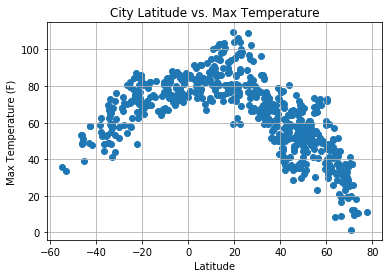

This plot is analyzing the max temperature of all cities on their latitude


<Figure size 432x288 with 0 Axes>

In [68]:
# Build scatter plot for latitude vs. temperature

latplot=clean_city_data["Latitude"]
tempplot=clean_city_data["Max Temp"]

plt.scatter(latplot,tempplot)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

plt.savefig("output_data/Temp_Plot.PNG")
print("This plot is analyzing the max temperature of all cities on their latitude")

## Latitude vs. Humidity Plot

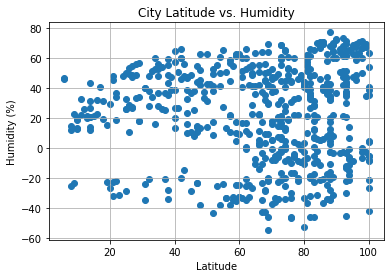

This plot is analyzing the humidity percentage of all cities on their latitude


<Figure size 432x288 with 0 Axes>

In [69]:
# Build scatter plot for latitude vs. humidity

humidplot=clean_city_data["Humidity"]

plt.scatter(humidplot,latplot)

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

plt.savefig("output_data/Humidity_Plot.PNG")
print("This plot is analyzing the humidity percentage of all cities on their latitude")

## Latitude vs. Cloudiness Plot

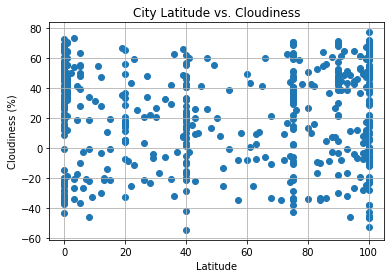

This plot is analyzing the cloudiness percentage of all cities on their latitude


<Figure size 432x288 with 0 Axes>

In [70]:
# Build scatter plot for latitude vs. cloudiness

cloudplot=clean_city_data["Cloudiness"]

plt.scatter(cloudplot,latplot)

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

plt.savefig("output_data/Cloudiness_Plot.PNG")
print("This plot is analyzing the cloudiness percentage of all cities on their latitude")

## Latitude vs. Wind Speed Plot

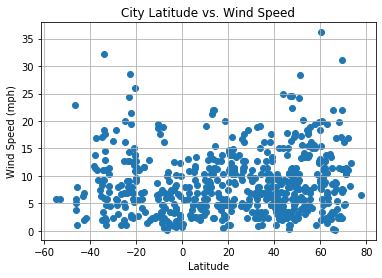

This plot is analyzing the wind speed (mph) of all cities on their latitude


<Figure size 432x288 with 0 Axes>

In [71]:
# Build scatter plot for latitude vs. wind speed

windplot=clean_city_data["Wind Speed"]

plt.scatter(latplot,windplot)

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

plt.savefig("output_data/Wind_Speed_Plot.PNG")
print("This plot is analyzing the wind speed (mph) of all cities on their latitude")

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, eq_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,eq_loc,fontsize=15,color="red")
    plt.title(f"Latitude vs. {y_label}")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"The correlation between latitude and {y_label} is: {rvalue}")

    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
North_Hemp=clean_city_data.loc[clean_city_data["Latitude"] >= 0]
South_Hemp=clean_city_data.loc[clean_city_data["Latitude"] < 0,:]

North_Hemp

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Halifax,44.65,-63.57,37.00,73,95,3.00,CA,1588751386
2,Torbay,47.67,-52.73,35.01,92,90,11.41,CA,1588751668
3,Nikolskoye,59.70,30.79,61.00,38,23,8.95,RU,1588751541
5,Barrow,71.29,-156.79,12.20,85,1,11.41,US,1588751669
7,Papillion,41.15,-96.04,45.00,87,40,5.97,US,1588751669
...,...,...,...,...,...,...,...,...,...
584,Safi,32.30,-9.24,64.92,73,100,18.84,MA,1588751653
585,Santa Cruz,30.42,-9.60,62.60,93,90,3.36,MA,1588751810
586,Parrita,9.52,-84.32,73.40,69,100,10.29,CR,1588751810
587,Santa Rosa,14.31,121.11,98.01,50,40,11.41,PH,1588751810


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and Max Temp is: -0.8314059287089265


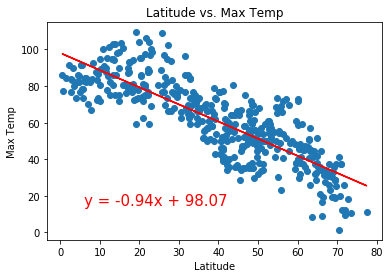

r value of -0.83 indicates a strong negative correlation between latitude and max temperature in Northern Hemisphere. As latitude increases, max temperature decrases


<Figure size 432x288 with 0 Axes>

In [72]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,15))

plt.savefig("output_data/North_Hemisphere_Temp_Plot.PNG")
print("r value of -0.83 indicates a strong negative correlation between latitude and max temperature in Northern Hemisphere. As latitude increases, max temperature decrases")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and Max Temp is: 0.7585074719604172


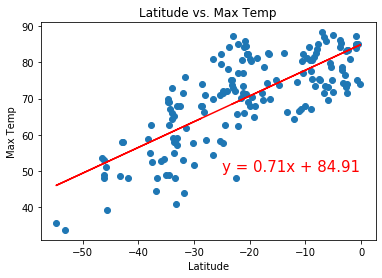

r value of 0.759 indicates a strong positive correlation between latitude and max temperature in Southern Hemisphere.
As latitude increases, max temperature increases


<Figure size 432x288 with 0 Axes>

In [76]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-25,50))

plt.savefig("output_data/South_Hemisphere_Temp_Plot.PNG")
print("r value of 0.759 indicates a strong positive correlation between latitude and max temperature in Southern Hemisphere.") 
print("As latitude increases, max temperature increases")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and Humidity (%) is: 0.2138488861142147


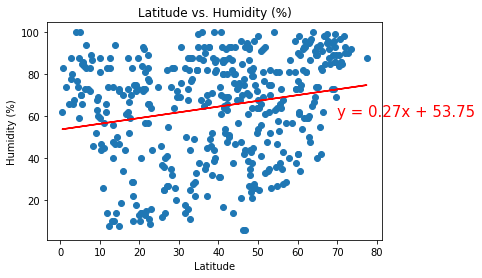

r value of 0.214 indicates very weak to no correlation between latitude and humidity in Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [73]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(70,60))

plt.savefig("output_data/North_Hemisphere_Humidity_Plot.PNG")
print("r value of 0.214 indicates very weak to no correlation between latitude and humidity in Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and Humidity (%) is: 0.29906622288311435


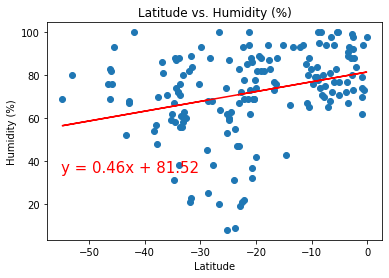

r value of 0.299 indicates a weak or no correlation between latitude and humidity in Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [77]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(-55,35))

plt.savefig("output_data/South_Hemisphere_Humid_Plot.PNG")
print("r value of 0.299 indicates a weak or no correlation between latitude and humidity in Southern Hemisphere.") 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and Cloudiness (%) is: 0.1224851255838502


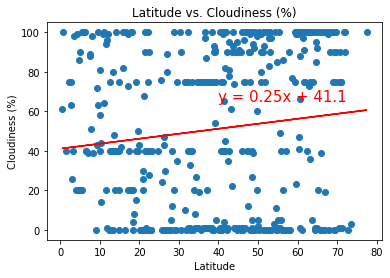

r value of 0.122 indicates very weak to no correlation between latitude and cloudiness in Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [74]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(40,65))

plt.savefig("output_data/North_Hemisphere_Cloudiness_Plot.PNG")
print("r value of 0.122 indicates very weak to no correlation between latitude and cloudiness in Northern Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and Cloudiness (%) is: 0.16364110700573228


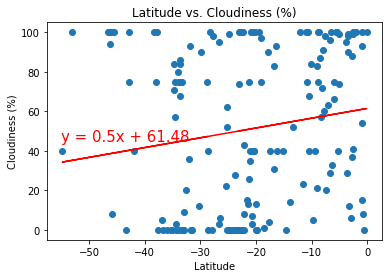

r value of 0.164 indicates a weak or no correlation between latitude and cloudiness in Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [78]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(-55,45))

plt.savefig("output_data/South_Hemisphere_Cloudiness_Plot.PNG")
print("r value of 0.164 indicates a weak or no correlation between latitude and cloudiness in Southern Hemisphere.") 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and Wind Speed (mph) is: 0.11508511834354442


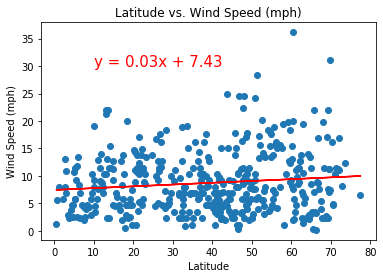

r value of 0.115 indicates very weak to no correlation between latitude and wind speed in Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [75]:
x_values = North_Hemp["Latitude"]
y_values = North_Hemp["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(10,30))

plt.savefig("output_data/North_Hemisphere_Wind_Speed_Plot.PNG")
print("r value of 0.115 indicates very weak to no correlation between latitude and wind speed in Northern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and Wind Speed (mph) is: -0.17473677603968057


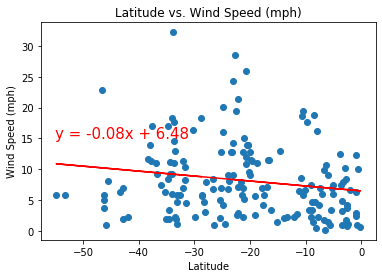

r value of -0.175 indicates a weak or no correlation between latitude and wind speed in Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [79]:
x_values = South_Hemp["Latitude"]
y_values = South_Hemp["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(-55,15))

plt.savefig("output_data/South_Hemisphere_Wind_Speed_Plot.PNG")
print("r value of -0.175 indicates a weak or no correlation between latitude and wind speed in Southern Hemisphere.") 